# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.

In [48]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

- Read that data into Python and call the dataframe `churnData`.

In [49]:
churnData = pd.read_csv('files_for_lab/Customer-Churn.csv')

In [50]:
churnData.shape

(7043, 16)

- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.

In [51]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [52]:

churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- Check for null values in the dataframe. Replace the null values.

In [53]:
churnData.isnull().sum().sort_values(ascending=False)

TotalCharges        11
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
Churn                0
dtype: int64

In [57]:

churnData.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Scale the features either by using normalizer or a standard scaler.
  - Split the data into a training set and a test set.
  - Fit a logistic regression model on the training data.
  - Check the accuracy on the test data.

**Note**: So far we have not balanced the data.

In [59]:
features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']
X = pd.DataFrame(data=churnData, columns=features)
X.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [60]:
y = churnData['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [61]:
#Encoding the target #0 is No Churn, 1 is Yes Churn

y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [63]:
#Scales using normalizerX_norm
X_norm

array([[0.02368203, 0.        , 0.70690847, 0.70690847],
       [0.0179831 , 0.        , 0.0301217 , 0.99938446],
       [0.01655198, 0.        , 0.44566203, 0.89504826],
       ...,
       [0.03161954, 0.        , 0.08508531, 0.99587183],
       [0.01267729, 0.00316932, 0.23579761, 0.97171433],
       [0.00964118, 0.        , 0.0154332 , 0.99983442]])

In [64]:
#Scaled using standard scaler
X_scaled

array([[-1.27744458, -0.43991649, -1.16032292, -0.99497138],
       [ 0.06632742, -0.43991649, -0.25962894, -0.17387565],
       [-1.23672422, -0.43991649, -0.36266036, -0.96039939],
       ...,
       [-0.87024095, -0.43991649, -1.1686319 , -0.85518222],
       [-1.15528349,  2.27315869,  0.32033821, -0.87277729],
       [ 1.36937906, -0.43991649,  1.35896134,  2.01391739]])

In [65]:
#Train, test split
Xn_train, Xn_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
Xs_train, Xs_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

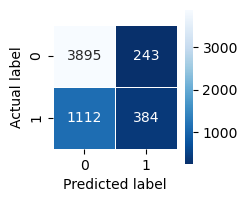

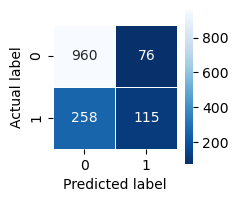

(LogisticRegression(random_state=0),
 0.7594959176428825,
 array([[3895,  243],
        [1112,  384]], dtype=int64),
 0.7629524485450674,
 array([[960,  76],
        [258, 115]], dtype=int64))

In [67]:
#Fit a logistic regression model
#Using normalized X
model_norm_train = logmodel(Xn_train,Xn_test,y_train, y_test)
model_norm_train

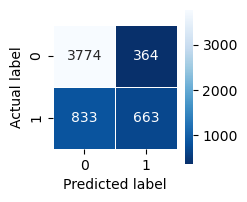

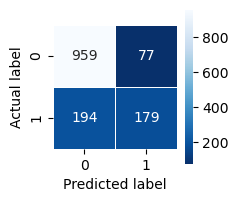

(LogisticRegression(random_state=0),
 0.7875399361022364,
 array([[3774,  364],
        [ 833,  663]], dtype=int64),
 0.8076650106458482,
 array([[959,  77],
        [194, 179]], dtype=int64))

In [68]:
#Using scaled X
model_scaled = logmodel(Xs_train,Xs_test,y_train, y_test)
model_scaled

In [69]:
# We will use the model with scaled data from here on because it has a better performance than the one with normalized data

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

In [70]:
y['Churn'].value_counts()/len(y['Churn'])*100
# 73% of rows are clients that left the company and 26% are clients that stayed -> we have imbalance

0    73.463013
1    26.536987
Name: Churn, dtype: float64

In [108]:
X = df_scaled.drop(['Churn'], axis=1)
y = df_scaled['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [109]:
y_train.value_counts()/len(y_train)

0    0.736965
1    0.263035
Name: Churn, dtype: float64

In [110]:
df_train = pd.concat([X_train,y_train], axis=1)
df_train

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
298,0.310650,-0.439916,0.325324,0.323400,0
3318,-0.910961,-0.439916,-1.171955,-0.895450,1
5586,-0.218715,-0.439916,-1.515947,-0.786789,0
6654,-1.033122,-0.439916,0.722493,-0.750959,1
5362,1.328659,-0.439916,-1.329826,-0.250879,0
...,...,...,...,...,...
3772,-1.277445,-0.439916,1.004999,-0.966206,1
5191,-0.381597,-0.439916,0.875378,-0.037530,0
5226,-0.829521,-0.439916,-1.449476,-0.873020,0
5390,-0.829521,2.273159,1.152899,-0.478246,1


In [111]:

print(len(category_0))
print(len(category_1))

3477
1241


In [112]:

print(len(category_0))
print(len(category_1))

1241
1241


In [113]:
df_down

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
2694,-0.992402,-0.439916,-1.499330,-0.933201,0
6442,1.410099,-0.439916,-0.472339,0.507078,0
1290,1.613701,2.273159,0.654359,1.596824,0
4429,1.532261,-0.439916,0.496489,1.527702,0
1877,1.613701,-0.439916,0.790627,1.801033,0
...,...,...,...,...,...
6231,-1.277445,2.273159,0.386810,-0.974418,1
5334,0.677133,-0.439916,1.435404,1.328968,1
3092,-1.277445,-0.439916,-1.318194,-0.997069,1
3772,-1.277445,-0.439916,1.004999,-0.966206,1


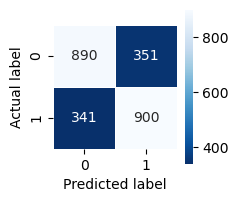

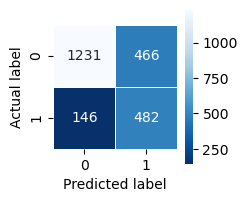

(LogisticRegression(random_state=0),
 0.7211925866236906,
 array([[890, 351],
        [341, 900]], dtype=int64),
 0.7367741935483871,
 array([[1231,  466],
        [ 146,  482]], dtype=int64))

In [115]:
model_down = logmodel(X_down_train,X_test,y_down_train, y_test)
model_down

In [117]:
#Upsampling
category_0=df_train[df_train['Churn']==0]
category_1=df_train[df_train['Churn']==1]
print(len(category_0))
print(len(category_1))
category_1=category_1.sample(len(category_0),replace=True)
print(len(category_0))
print(len(category_1))

3477
1241
3477
3477


In [118]:
df_up

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
298,0.310650,-0.439916,0.325324,0.323400,0
5586,-0.218715,-0.439916,-1.515947,-0.786789,0
5362,1.328659,-0.439916,-1.329826,-0.250879,0
2840,-0.381597,-0.439916,0.652698,-0.152969,0
229,0.595692,-0.439916,0.682610,0.805333,0
...,...,...,...,...,...
4480,-1.277445,-0.439916,0.154159,-0.977509,1
2861,-1.277445,-0.439916,0.571270,-0.971968,1
1790,-0.829521,-0.439916,0.443311,-0.589887,1
306,-0.015113,2.273159,0.336956,0.008853,1


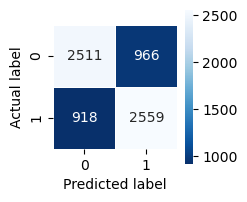

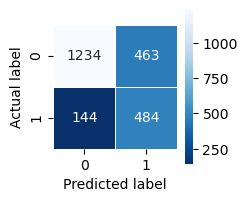

(LogisticRegression(random_state=0),
 0.729076790336497,
 array([[2511,  966],
        [ 918, 2559]], dtype=int64),
 0.7389247311827957,
 array([[1234,  463],
        [ 144,  484]], dtype=int64))

In [120]:
model_up = logmodel(X_up_train,X_test,y_up_train,y_test)
model_up

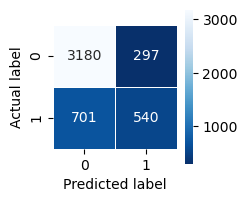

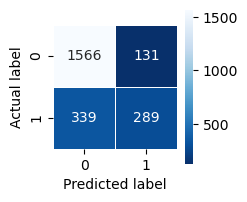

In [122]:
model_scaled =logmodel(X_train, X_test, y_train, y_test) #test size 0.33

In [123]:
model_scaled, model_down, model_up #with test size 0.33

((LogisticRegression(random_state=0),
  0.7884696905468419,
  array([[3180,  297],
         [ 701,  540]], dtype=int64),
  0.7978494623655914,
  array([[1566,  131],
         [ 339,  289]], dtype=int64)),
 (LogisticRegression(random_state=0),
  0.7211925866236906,
  array([[890, 351],
         [341, 900]], dtype=int64),
  0.7367741935483871,
  array([[1231,  466],
         [ 146,  482]], dtype=int64)),
 (LogisticRegression(random_state=0),
  0.729076790336497,
  array([[2511,  966],
         [ 918, 2559]], dtype=int64),
  0.7389247311827957,
  array([[1234,  463],
         [ 144,  484]], dtype=int64)))